In [1]:
# Web scrapping

In [2]:
import urllib

In [10]:
# create the reponse object
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

In [11]:
response

In [12]:
html = response.read()

In [13]:
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Rajgad Fort - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"693e1e03-7da7-4a7b-9461-45e7e1c18e35","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Rajgad_Fort","wgTitle":"Rajgad Fort","wgCurRevisionId":1054063656,"wgRevisionId":1054063656,"wgArticleId":12475798,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from November 2021","All articles needing additional references","Articles with short description","Short descri

In [14]:
from bs4 import BeautifulSoup

In [15]:
soup = BeautifulSoup(html, 'html')

In [16]:
data = soup.get_text(strip=True)

In [17]:
data

'Rajgad Fort - WikipediaRajgad FortFrom Wikipedia, the free encyclopediaJump to navigationJump to searchThis articleneeds additional citations forverification.Please helpimprove this articlebyadding citations to reliable sources. Unsourced material may be challenged and removed.Find sources:"Rajgad Fort"–news·newspapers·books·scholar·JSTOR(November 2021)(Learn how and when to remove this template message)Hill fort in Pune district, Maharashtra, IndiaNot to be confused withRaigad Fort.Rajgad FortPart of on MaharashtraPune District,MaharashtraRajgad FortShown withinMaharashtraShow map of MaharashtraRajgad FortRajgad Fort (India)Show map of IndiaCoordinates18°14′48″N73°40′56″E\ufeff / \ufeff18.2467°N 73.6823°E\ufeff /18.2467; 73.6823TypeHill fortHeight1376 mRajgad(literal meaningRuling Fort) is a hill fort situated in thePunedistrict ofMaharashtra,India. Formerly known asMurumdev, the fort was the capital of theMaratha Empireunder the rule ofChatrapati Shivaji Maharajfor almost 26 years, 

In [19]:
images = soup.find_all('img')

In [20]:
images[3]

<img alt="Rajgad Fort" data-file-height="64" data-file-width="64" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/10px-Red_pog.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/15px-Red_pog.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/20px-Red_pog.svg.png 2x" title="Rajgad Fort" width="10"/>

In [21]:
images[3]['title']

'Rajgad Fort'

In [22]:
images[3]['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Red_pog.svg/10px-Red_pog.svg.png'

In [23]:
soup.title

<title>Rajgad Fort - Wikipedia</title>

In [24]:
soup.title.string

'Rajgad Fort - Wikipedia'

In [26]:
text = [x for x in data.split()]

In [28]:
import nltk

In [29]:
frq = nltk.FreqDist(text)

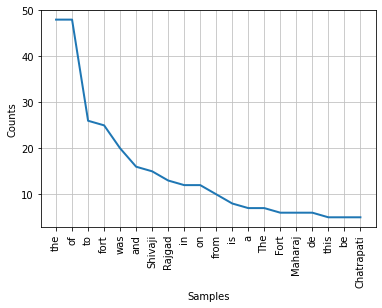

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
frq.plot(20, cumulative=False)

In [32]:
from nltk.corpus import stopwords

In [33]:
swords = stopwords.words('english')

In [37]:
clean_tokens = []
for x in text:
    if x.lower() not in swords:
        clean_tokens.append(x.lower())

In [38]:
clean_tokens

['rajgad',
 'fort',
 '-',
 'wikipediarajgad',
 'fortfrom',
 'wikipedia,',
 'free',
 'encyclopediajump',
 'navigationjump',
 'searchthis',
 'articleneeds',
 'additional',
 'citations',
 'forverification.please',
 'helpimprove',
 'articlebyadding',
 'citations',
 'reliable',
 'sources.',
 'unsourced',
 'material',
 'may',
 'challenged',
 'removed.find',
 'sources:"rajgad',
 'fort"–news·newspapers·books·scholar·jstor(november',
 '2021)(learn',
 'remove',
 'template',
 'message)hill',
 'fort',
 'pune',
 'district,',
 'maharashtra,',
 'indianot',
 'confused',
 'withraigad',
 'fort.rajgad',
 'fortpart',
 'maharashtrapune',
 'district,maharashtrarajgad',
 'fortshown',
 'withinmaharashtrashow',
 'map',
 'maharashtrarajgad',
 'fortrajgad',
 'fort',
 '(india)show',
 'map',
 'indiacoordinates18°14′48″n73°40′56″e\ufeff',
 '/',
 '\ufeff18.2467°n',
 '73.6823°e\ufeff',
 '/18.2467;',
 '73.6823typehill',
 'fortheight1376',
 'mrajgad(literal',
 'meaningruling',
 'fort)',
 'hill',
 'fort',
 'situated',
 

In [39]:
frq = nltk.FreqDist(clean_tokens)

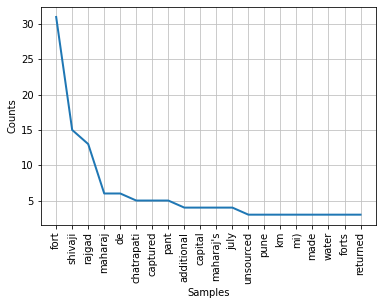

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
frq.plot(20, cumulative=False)

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [43]:
clean_tokens = [ps.stem(x) for x in clean_tokens]

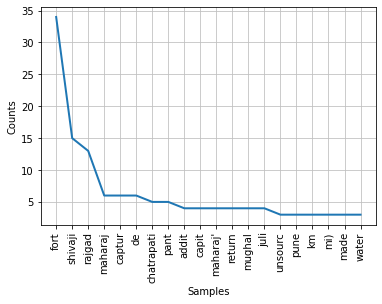

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [44]:
frq = nltk.FreqDist(clean_tokens)
frq.plot(20, cumulative=False)